# Searching - A practical exercise

# Objectives

The aim of this notebook is to help you understand different searching algorithms and their performance. There is a lot of code in the notebook that you do not need to worry about. The only things you should worry about are the 2 searching algorithms you will have to implement. These are:
- Linear search
- Binary search

Do not worry if you cannot complete these in the lesson. They are purely for you to get a bit more experience with different searching algorithms. If you are really interested, these notebooks are accessible from home as well.

# Helper functions

Here we define a collection of functions that will be useful for the rest of the exercise. You do not need to worry about these functions.

You'll need to run this cell to get started.

In [1]:
# so our plots get drawn in the notebook
%matplotlib inline
from matplotlib import pyplot as plt
from random import randint
from time import clock
from random import randrange
import numpy as np
from utils import time_f, reject_outliers

def time_searches(lower, upper, steps, searches):
    # Create a list with lists of times for each searching algorithm
    times = [[] for _ in range(len(searches) + 1)]
    
    # Loop to a list of size n
    for i in range(lower, upper, steps):
        # Apply each search 
        for search_index, search in enumerate(searches):
            unavg_time = []
            # Average the time over 500 searches of the list
            for j in range(500):
                ordered_list_temp = [num for num in range(i)]
                runtime = time_f(lambda: search(ordered_list_temp, randint(0, i-1)))
                unavg_time.append(runtime)
            
            # Calculate and save the average runtime (without outliers)
            unavg_time = reject_outliers(unavg_time)
            avg_runtime = sum(unavg_time) / len(unavg_time)
            times[search_index].append(avg_runtime)
    return times

def benchmark_searches(searches, lower, upper, steps):
    # Get list of search names
    search_labels = [search.__name__ for search in searches]
    # Calculate search times
    times = time_searches(lower, upper, steps, searches)
    
    # Plot each searching algorithm with its name
    for index, search_label in enumerate(search_labels):
        plt.plot(range(lower, upper, steps), times[index], label=search_label)
        
    # Add axis labels and legend
    plt.xlabel('n')
    plt.ylabel('time (/s)')
    plt.legend(search_labels)
    
    plt.show()

    
def test_search(search_func):
    # Build an ordered array of values
    n = 100
    x = [i for i in range(n)]
    act_index = randint(0, n-1)

    search_name = search_func.__name__
    positive_success = search_func(x, x[act_index]) == act_index
    negative_success = search_func(x, n+1) == None
    
    
    if positive_success and negative_success:
        print(search_name + " works!")
    else:
        print(search_name + " has failed.")
        




## Task 1: Linear search

In this task you are asked to implement `linear_search`. You have been provided with test cases to see if your implementation works. Do not change the function defintion. You should return the first index the value occurs at in the list or `None` if the value does not occur in the list.

In [2]:
def linear_search(a, val):
    for index, value in enumerate(a):
        if value == val:
            return index
                    
    return None

Run this test to confirm your implementation is correct. Do not edit the test cases.

In [3]:
test_search(linear_search)

linear_search works!


## Task 2: Binary Search

In this task you are asked to implement `linear_search`. You have been provided with test cases to see if your implementation works. Do not change the function defintion. You should return the first index the value occurs at in the list or `None` if the value does not occur in the list.

In [4]:
def binary_search(a, val):
    
    left = 0
    right = len(a) - 1    
    
    while left <= right:
        middle = int((left + right) / 2)
                
        if a[middle] == val:
            return middle
        
        if a[middle] < val:
            left = middle + 1
        else:
            right = middle - 1
    
    return None
    
    
    
    

Run this test to confirm your implementation is correct. Do not edit the test cases.

In [5]:
test_search(binary_search)


binary_search works!


## Analysing the running time performance of linear search and binary search

Here we will compare the running times of linear search and binary search. You do not need to make any modifications to this code. Just run the code below.

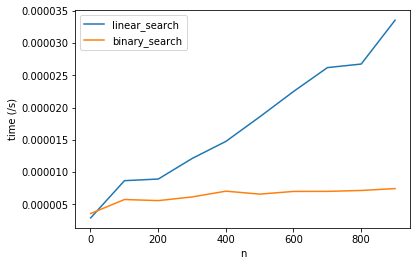

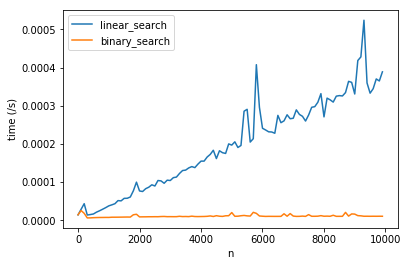

In [6]:
benchmark_searches([linear_search, binary_search], 1, 1000, 100)
benchmark_searches([linear_search, binary_search], 1, 10000, 100)

You can see that binary search runs much faster than linear search. So why don't we always use binary search? Remember, binary search only works on sorted lists!

# Never write your own search!

Although we've just seen how you can, it's important to note that you should never write your own search! This is because the inbuilt sort often makes use of extremely advanced features that make it faster than something we could write.

In [7]:
from bisect import bisect_left

def inbuilt_binary_search(a,val):
    return bisect_left(a, val)    

Run the benchmark below to see the performance difference!

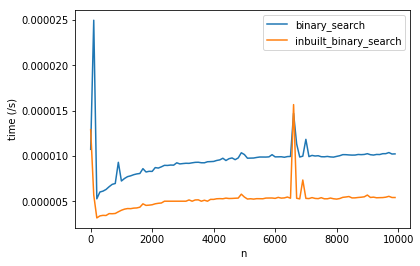

In [8]:
benchmark_searches([binary_search, inbuilt_binary_search], 1, 10000, 100)